# Exercise - NumPy to CuPy - `ndarray` Basics

Let's revisit our first NumPy exercise and try porting it to CuPy.

In [1]:
import numpy as np
import cupy as cp

xp = cp

Create the input data array with the numbers `1` to `500_000_000`.

In [2]:
arr = xp.arange(1, 500_000_001)
arr

array([        1,         2,         3, ..., 499999998, 499999999,
       500000000])

Calculate how large the array is in GB with `nbytes`.

In [3]:
arr.nbytes / 1e9

4.0

How many dimensions does the array have?

In [4]:
arr.ndim # `len(arr.shape)` also works, but is longer to type.

1

How many elements does the array have?

In [5]:
arr.size # For 1D array, `arr.shape[0]` also works, but `arr.size` multiplies the size of all dimensions.

500000000

What is the shape of the array?

In [6]:
arr.shape

(500000000,)

Create a new array with `5_000_000` elements containing equally spaced values between `0` to `1000` (inclusive).

In [7]:
arr = xp.linspace(0, 1000, 5_000_000, endpoint=True)
arr

array([0.0000000e+00, 2.0000004e-04, 4.0000008e-04, ..., 9.9999960e+02,
       9.9999980e+02, 1.0000000e+03])

Create a random array that is `10_000` by `5_000`.

In [8]:
arr = xp.random.rand(10_000, 5_000)
arr

array([[0.08697936, 0.35322981, 0.62015544, ..., 0.2891082 , 0.40311846,
        0.71151503],
       [0.82498787, 0.77415564, 0.24219944, ..., 0.65722375, 0.95176224,
        0.6986505 ],
       [0.48013527, 0.86062076, 0.48969006, ..., 0.27731673, 0.47629988,
        0.72536677],
       ...,
       [0.68989286, 0.28204957, 0.17000424, ..., 0.58732222, 0.77870015,
        0.10759341],
       [0.4248917 , 0.45121514, 0.68189309, ..., 0.44954367, 0.86652203,
        0.76741138],
       [0.11071949, 0.57219722, 0.12184321, ..., 0.44095288, 0.61739194,
        0.40693866]])

Sort that array.

In [9]:
arr = xp.sort(arr)
arr

array([[1.16741233e-04, 1.17541646e-04, 4.15504557e-04, ...,
        9.99734881e-01, 9.99744017e-01, 9.99885151e-01],
       [1.80565349e-04, 5.82297860e-04, 8.57890525e-04, ...,
        9.99160672e-01, 9.99569890e-01, 9.99837684e-01],
       [6.96403225e-05, 1.27802546e-04, 1.38072396e-04, ...,
        9.99500184e-01, 9.99525861e-01, 9.99832929e-01],
       ...,
       [7.72478791e-05, 1.06358384e-03, 1.13901437e-03, ...,
        9.99594387e-01, 9.99671377e-01, 9.99918528e-01],
       [2.37144345e-04, 2.76253449e-04, 3.04364566e-04, ...,
        9.99856679e-01, 9.99919582e-01, 9.99984767e-01],
       [2.69970582e-04, 3.45351393e-04, 4.04881067e-04, ...,
        9.99422333e-01, 9.99462723e-01, 9.99806676e-01]])

Reshape the CuPy array to have the last dimension of length `5`.

In [10]:
arr = arr.reshape((-1, 5))
# -1 will infer the size of that dimension from the rest. Would also accept: arr.reshape((10_000_000, 5))
arr

array([[1.16741233e-04, 1.17541646e-04, 4.15504557e-04, 5.81784838e-04,
        1.00899970e-03],
       [1.72214471e-03, 1.79522131e-03, 1.81555425e-03, 2.64073945e-03,
        2.72353152e-03],
       [2.95934746e-03, 3.16724068e-03, 3.25417426e-03, 3.94284855e-03,
        4.03170970e-03],
       ...,
       [9.97026304e-01, 9.97039507e-01, 9.97300173e-01, 9.97518830e-01,
        9.97749822e-01],
       [9.98397399e-01, 9.98412355e-01, 9.98623190e-01, 9.98625603e-01,
        9.98942490e-01],
       [9.99060315e-01, 9.99178188e-01, 9.99422333e-01, 9.99462723e-01,
        9.99806676e-01]])

Find the sum of each row. Rows are axis 0, but the sum is being applied across columns, which are axis 1.

In [11]:
arr_sum = xp.sum(arr, axis=1) # You could also write `arr.sum(axis=1)`.
arr_sum

array([2.24057198e-03, 1.06971912e-02, 1.73553206e-02, ...,
       4.98663464e+00, 4.99300104e+00, 4.99693023e+00])

Normalize each row of the original random array by dividing by the sum you just computed using broadcasting.

In [12]:
arr_normalized = arr / arr_sum[:, xp.newaxis]
arr_normalized

array([[0.05210332, 0.05246055, 0.18544575, 0.25965907, 0.45033131],
       [0.16099036, 0.16782175, 0.16972252, 0.24686288, 0.25460249],
       [0.17051529, 0.18249393, 0.18750298, 0.22718385, 0.23230396],
       ...,
       [0.19993971, 0.19994236, 0.19999463, 0.20003848, 0.20008481],
       [0.19995938, 0.19996238, 0.2000046 , 0.20000509, 0.20006855],
       [0.19993481, 0.1999584 , 0.20000726, 0.20001534, 0.20008418]])

Prove that your normalized array is actually normalized by checking that every row sums to 1.

If we try to use `np.testing.assert_allclose` with CuPy arrays, we get an error because CuPy arrays don't implicitly convert to NumPy arrays. We'll learn more about this in the next section.

In [13]:
xp.testing.assert_allclose(xp.sum(arr_normalized, axis=1), 1.0)

Let's benchmark CuPy's sort against NumPy's sort by discretizing a sine function with `50_000_000` elements.

In [14]:
import cupyx as cpx

arr_np = np.sin(np.linspace(0, 2 * np.pi, 50_000, endpoint=False))
arr_cp = cp.sin(cp.linspace(0, 2 * cp.pi, 50_000, endpoint=False))

print("NumPy Execution Time")
print(cpx.profiler.benchmark(lambda: np.sort(arr_np), n_repeat=10, n_warmup=1))

print()

print("CuPy Execution Time")
print(cpx.profiler.benchmark(lambda: cp.sort(arr_cp), n_repeat=10, n_warmup=1))

NumPy Execution Time
<lambda>            :    CPU:  1261.982 us   +/- 189.131 (min:  1124.969 / max:  1809.100) us     GPU-0:  1281.686 us   +/- 189.990 (min:  1144.960 / max:  1830.912) us

CuPy Execution Time
<lambda>            :    CPU:   173.710 us   +/- 13.717 (min:   157.797 / max:   203.904) us     GPU-0:   181.472 us   +/- 14.138 (min:   165.280 / max:   210.944) us


Notice how both the CPU and GPU times are reported? This requires a little explanation.

`cupyx.profiler.benchmark` will synchronize with the GPU before launching the benchmark,

The CPU time is the overall time - how long the entire operation took. If you timed the operation yourself on your watch, this is the time you'd get. It includes:
- The time spent running code on the CPU.
- The time spent launching work on the GPU.
- The time spent waiting for the work on the GPU to finish.

The GPU time is how long the GPU spent doing computations. It excludes launch and synchronization costs.

Now, let's do a parameter sweep to find the size at which CuPy will beat NumPy for this problem.

In [ ]:
repeat = 10
warmup = 1
sizes = [5, 50, 500, 5_000, 50_000, 500_000, 5_000_000, 50_000_000]
times_np = []
times_cp = []

for n in sizes:
  arr_np = np.sin(np.linspace(0, 2 * np.pi, n, endpoint=False))
  arr_cp = cp.sin(cp.linspace(0, 2 * cp.pi, n, endpoint=False))

  b_np = cpx.profiler.benchmark(
    lambda: np.sort(arr_np), n_repeat=repeat, n_warmup=warmup
  )
  b_cp = cpx.profiler.benchmark(
    lambda: cp.sort(arr_cp), n_repeat=repeat, n_warmup=warmup
  )
  times_np.append(b_np.cpu_times.mean())
  times_cp.append(b_cp.cpu_times.mean())

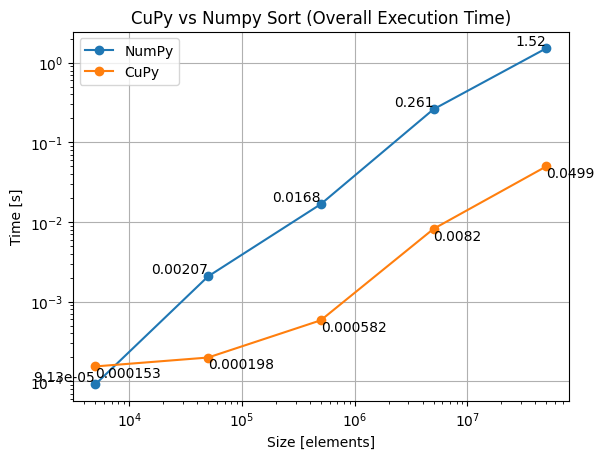

In [ ]:
import matplotlib.pyplot as plt

plt.plot(sizes, times_np, marker='o', label='NumPy')
plt.plot(sizes, times_cp, marker='o', label='CuPy')

for x, y in zip(sizes, times_np):
  plt.text(x, y, f'{x:.3g}', va='bottom', ha='right')
for x, y in zip(sizes, times_cp):
  plt.text(x, y, f'{x:.3g}', va='top', ha='left')

plt.xscale('log')
plt.yscale('log')

plt.title('CuPy vs Numpy Sort (Overall Execution Time)')
plt.xlabel('Size [elements]')
plt.ylabel('Time [s]')

plt.legend()

plt.grid(True)

plt.show()